In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import pickle
%matplotlib inline
from scipy.stats import gaussian_kde
from utils import *

In [4]:
#prob = pd.read_csv('../models/TestSet1Predictions.csv')

prob = pd.read_csv('./TestSet2Predictions.csv')
prob_snr = np.load('../models/snr_preds.npy')


# prob = pd.read_csv('/datax/yzhang/models/TestSet1Predictions.csv')
# prob_snr = np.load('../../snr_preds.npy')


FileNotFoundError: File b'./TestSet2Predictions.csv' does not exist

In [4]:
prob.columns

Index(['Index', '16PSK', '2FSK_5KHz', '2FSK_75KHz', '8PSK', 'AM_DSB', 'AM_SSB',
       'APSK16_c34', 'APSK32_c34', 'BPSK', 'CPFSK_5KHz', 'CPFSK_75KHz',
       'FM_NB', 'FM_WB', 'GFSK_5KHz', 'GFSK_75KHz', 'GMSK', 'MSK', 'NOISE',
       'OQPSK', 'PI4QPSK', 'QAM16', 'QAM32', 'QAM64', 'QPSK'],
      dtype='object')

In [5]:
pred_snr = np.argmax(prob_snr, axis=1)
pred = prob[prob.columns[1:]].idxmax(axis=1)

In [8]:
# testfile = '/home/yunfanz/Dataset2/Test_Set_2_Army_Signal_Challenge.pkl'
# trainfile = '/bldata/army_challenge/training_data/training_data_chunk_0.pkl'

testfile = '../../Test_Set_2_Army_Signal_Challenge.pkl'
trainfile = '/datax/yzhang/training_data/training_data_chunk_0.pkl'
ft = open(testfile, 'rb')
ftr = open(trainfile, 'rb')
testdata = pickle.load(ft, encoding='latin-1')
traindata = pickle.load(ftr, encoding='lating-1')

In [9]:
def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

PI4QPSK 1247


/home/morads/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if sys.path[0] == '':


(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)
(576, 288, 4)


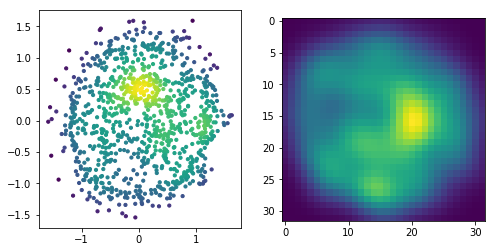

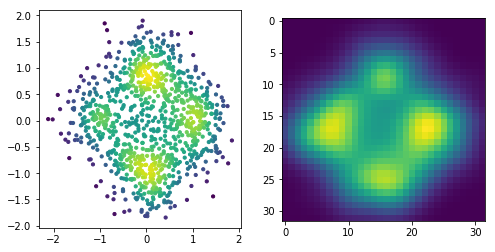

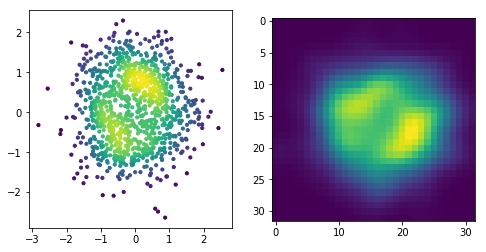

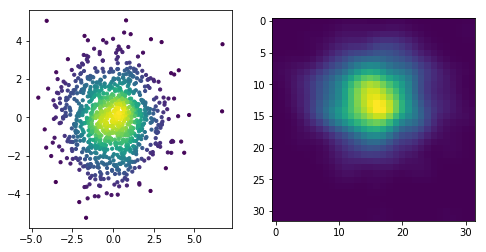

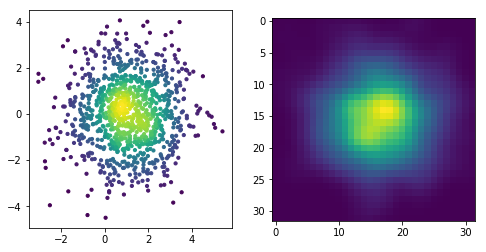

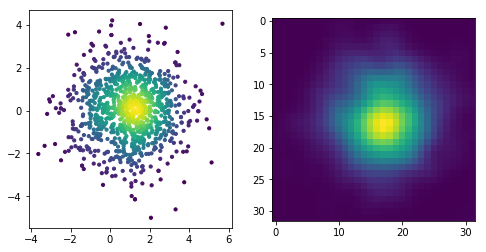

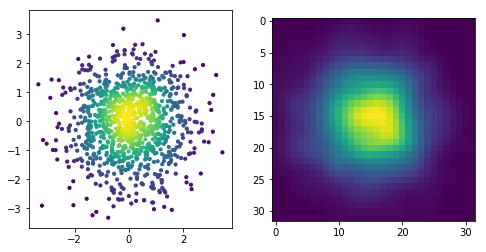

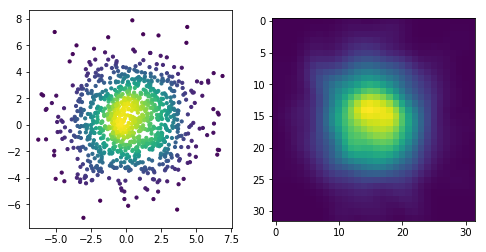

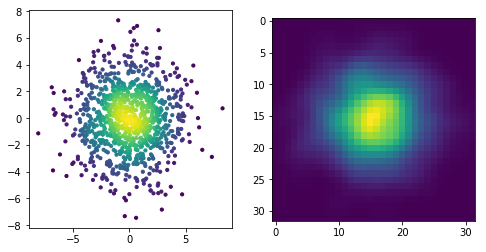

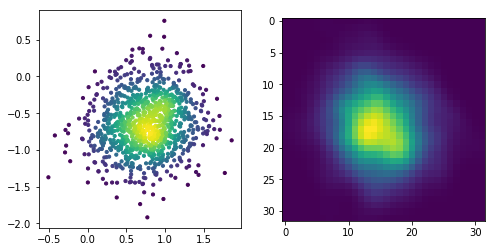

In [39]:
def dense_scatter(x,y, ax):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(x, y, c=z, s=10)
    
    
def dense_scatter2(x,y):
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy)
    
    xmin, xmax = np.min(x), np.max(x)
    ymin, ymax = np.min(y), np.max(y)
    
    shape = (32,32)

    xaxis = np.linspace(xmin, xmax, shape[0])
    yaxis = np.linspace(ymin, ymax, shape[1])
    
    res = np.empty(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            res[i,j] = kernel((xaxis[i], yaxis[j]))    
    return res
    
    
for MOD in [prob.columns[20]]:
    ind = np.asarray(pred.index[np.logical_and(pred_snr==5, pred==MOD)])
    print(MOD, ind.size)
    for i in range(10,20):
        test_signal = testdata[ind[i]+1]
        train_signal = traindata[(MOD, 10)][i]
        f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
        #f.figsize(8,4)
        
        dense_scatter(test_signal[0], test_signal[1], ax=ax1)
        plt.imshow(dense_scatter2(test_signal[0], test_signal[1]))
#         dense_scatter(train_signal[0], train_signal[1], ax=ax2)
        X = fig2data(f)
        print(X.shape)
    #plt.show()

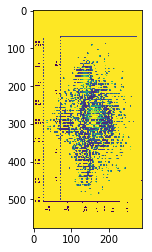

In [40]:
plt.imshow(X[:,:288,0])
plt.show()

In [5]:
trainfile = '/bldata/army_challenge/training_data/training_data_chunk_0.pkl'
ftr = open(trainfile, 'rb')
traindata = pickle.load(ftr, encoding='lating-1')

In [7]:
data = traindata[('QPSK', 10)]

In [8]:
data.shape

(2000, 2, 1024)

In [21]:
r = resample(data[:100], f=2)

In [10]:
r.shape

(100, 2, 1024)

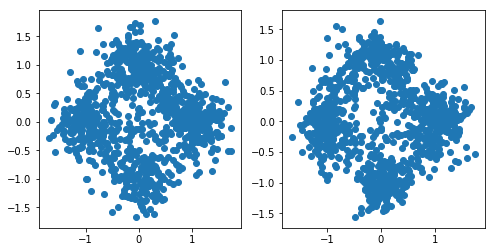

In [22]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.scatter(data[0,0], data[0,1])
ax2.scatter(r[0,0], r[0,1])
plt.show()